# Проектная работа 3 Курс 2021/2022

# Идентификация фунции фитнеса методами машинного обучения

# Этап 0 | Постановка задачи | Ожидаемый результат

Цель проекта: Восстановление функции фитнеса, с помощью различных методов машинного обучения

План работы:
- Теоретический модуль
   1. Для начала стоит изучить доступную литературу по данному предмету (список находится в конце Этапа 0)
   2. Изучить базовые возможности и синтаксис языка программирования Python
   3. Создание и исследование математической модели
   4. Ознакомление с возможностями Jupiter Notebook
- Практический модуль
   1. Создание обучающей выборки
   2. Обучение классификаторов
   3. Проверка качества классификатора
   4. Дополнительная проверка качества классификатора
   5. Правка багов и аномалий (тестирование и исправление ошибок)
   6. Написание финального отчета по окончаю проекта

Краткое изложение всей теоретической базы (*За более подробными данными в список литературы*)

Функция фитнеса - это функция биологической приспособленности
- Благодаря выявлению функции фитнеса есть возможность найти оптимальное решение
- Следовательно найти оптимальную стратегию поведения

Фитнес всегда определятеся по разному, но по всем (**моим**) наблюдениям это какая-то функция, которая зависит от различных параметров. Эти параметры (*Макропараметры*) в данной проектной работе представляют из себя описание окружающей среды, количество хищников, естественную смертность и тд. (*Более подробно в Этапе 1)

> Читатель: Почему объектом изучения является Зоопланктон?

> Breketov: Ну потому что это хорошо изученные организмы, + они перемещаются по всеми известной синусоиде (**Ни в коем случае не путать с косинусоидой о которой как оказалось никто не знает**)

> Breketov: Кстати говоря их перемещения носят отдельной научное название - суточные вертикальные миграции (СВМ) или на english (DVM - Diel vertical migration)

> Breketov: Ну а еще если переводить это в математику, то окажется, что выходит довольно простая система, с большим количесвом эмпирических данных

> Читатель: Я понял, можешь больше не продолжать, душнила.

> Высший разум: Рыбка плавать вверх и вниз и вкусно получать (Это шутка)

Ну и после небольших бед с б**кой^ можно поговорить об обучающей выборке:
- Выборка - конечный отбор чего-то с известной принадлежностью к одному из двух множеств
- И в работе необходимо будет создать обучающую выборку, в которой представлены признаки и принадлежность к определенному классу

В проектной работе в качестве стратегий будут две синусоиды (**НЕ КОСИНУСОИДЫ**), где одна относится к молодым особям, ну то есть к джунам, а другая к взрослым, ну или к сеньорам. Ну и касаемо ранжирования стоит сказать что в данном случае у нас будут сравниваться i-ый элемент с со всеми j-ими.

В проекте мы реализуем 2 главных метода классификации:
- Метод опорных векторов или на english мове (SVM)
- Фишеровский дискриминант или на мове (LDA)

Ну и в итоге планируется получить как можно более точные и правдоподобные результаты (*по крайней мере чтобы не оказалось так, что хищники увеличили популяцию зооплантончика нашего ненаглядного*)

Чорт, чуть не забыл про литературу нашу любимую:

- [*Exploring Evolutionary Fitness in Biological Systems Using Machine Learning Methods*](https://www.mdpi.com/1099-4300/23/1/35/htm)
- [*Лекции от Вышки по МО*](https://github.com/esokolov/ml-course-hse)
- [*Почему только 2, а потому что все легко гуглится мы же в 21 веке живем чувак) Это кстати тоже ссылка можешь перейти*](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки (Теория)

По реальным наблюдениям мы имее следующие коэффициенты для каждого поколения:

                                                Для молодых особей:
$
\alpha_J = 0.0016,
\beta_J = 0.0000007,
\gamma_J = 0.00008,
\delta_J = 0.000016
$

                                                Для взрослых особей:
$
\alpha_A = 0.006,
\beta_A = 0.000000075,
\gamma_A = 0.004,
\delta_A = 0.00006
$

Пусть имеют место параметризации функций окружающей среды:

- $E(x)$ - пространственное распределение пищи по вертикальной координате $x$

- $S(x)$ - пространственное распределение хищников по вертикальной координате $x$

- $S(t)$ - активность хищников

- $G(x)$ - совокупность дополнительных факторов окружающей среды, типо перепадов температур, радиция и тд.

И нам известны параметры $D$ - максимальная глубина и $D_0$ - оптимальная глубина. А так же $\sigma_1 = 1$, $\sigma_2 = 1$
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$ стратегии две стадии жизнии зоопланктона: молодых и взрослых особей
$$
x_{J} = A_{J} + B_{J}cos(2\pi\tau)\ \ \ \ \ \ x_{A} = A_{A} + B_{A}cos(2\pi\tau)
$$

Где мы должны взять ограничения для параметров A и B такие что: $ -D < A < 0$, $|B| < min(A + D, -A)$

Ключевыми макропараметрами являются:

$ M_1 $ и $ М_5 $ - количество потребляемой пищи в сутки

$ M_2 $ и $ М_6 $ - суточная смертность от хищников

$ M_3 $ и $ М_7 $ - метаболическая стоимость вертикальной миграции

$ M_4 $ и $ М_8 $ - смертность зоопланктона от неблагоприятных условий среды

                Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{Ji}(\tau))^2d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{Ji}(\tau))d\tau
$$
                Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{Ai}(\tau))^2d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{Ai}(\tau))d\tau
$$

Известная функция фитнеса: $ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

С коэффициентами:

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $ - воспроизводство 

$ s = \gamma_{A}M_6 $ - уровень смертности молодых особей

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $ - созревание молодых особей

$ q = \gamma_{J}M_2 $ - уровень смертности взрослых особей

Теперь с полностью подготовленной математической частью мы создаем с помощью рандомной генерации в заданных диапазонах параметры $A$ и $B$ для каждой стадии, количество генерируемых стратегий выберем небольшим, чтобы не сильно нагружать оборудование. Далее мы в интегралы всех макропараметров подставляем известные значения и вычисляем их после чего имеем более простую формулу нахождения этих макропараметров:

$M_1 = \sigma_1(A_J + D)$

$M_2 = -\sigma_2(A_J+ D + B_J/2)$

$M_3 = -2(\pi B_J)^2$

$M_4 = -((A_J + D_0)^2 + B_J^2/2)$

$M_5 = \sigma_1(A_A + D)$

$M_6 = -\sigma_2(A_A + D + B_A/2)$

$M_7 = -2(\pi B_A)^2$

$M_8 = -((A_A + D_0)^2 + B_A^2/2)$

На следующем шаге мы считаем параметры $s,p,q,r$ и соответственно найти значения функции фитнеса $J$ и стоит добавить, что если подкоренное выражение окажется равным нулю, то мы заменим значение фитнеса не комплексным числом, а нулем. Далее мы считаем пары стратегий с известными значениями фитнеса для каждой стратегии и если $M_i(\upsilon) - M_j(\omega) < 0 $, то мы идентифицируем эту точку в класс $-1$, иначе мы определим ее в класс $1$. После у нас будет готова обучающая выборка для классификаторов и уже разделив ее на тестовую и обучающую мы сможем обучить наши классификаторы. На выходе они нам дадут 44 числа, которые являются коэффициентами при макропараметрах в неизвесной функции фитнеса:

$F = \sum_{i=1}^8 \lambda_i M_i + \sum_{i=1}^8 \sum_{j=1}^8 \lambda_{ij} M_i M_j$, где  $\lambda_{ij} =  \lambda_{ji}$

Концом данного этапа станет подсчет точности классификатора по с помощью стандартного подхода и логарифмической потери, а также создание двумерных и трехмерных графиков с разделяющими гиперплоскостями полученными с помощью классификаторов SMV и LDA.

## 2. Реализация

### 2.1 Подготовка всех исходных данных

In [24]:
# Обозначим эмпирические данные молодых особей
alpha_j = 0.0016
betta_j = 0.0000007
gamma_j = 0.00008
delta_j = 0.000016

# Обозначим эмпирические данные взрослых особей
alpha_a = 0.006
betta_a = 0.000000075
gamma_a = 0.004
delta_a = 0.00006

sigma1 = 1
sigma2 = 1
D = 120
D0 = 70
# И размер выборки
Nmax = 10

In [25]:
import random as rn
import pandas as pd
# Генерация параметров для стратегий
# Запись параметров в data_strat
def strategy(Nmax):
   def rand_strat():
      A, B = [], []
      for i in range(0, Nmax):
         a = rn.uniform(-D, 0)
         b = rn.uniform(0, min(-a, a + D))
         A.append(a)
         B.append(b)
         A.append(a)
         B.append(-b)
      return A, B

   A, B = rand_strat()
   data_strat1 = {'Aj': A, 'Bj': B}
   data1 = pd.DataFrame(data = data_strat1)
   A, B = rand_strat()
   data_strat2 = {'Aa': A, 'Ba': B}
   data2 = pd.DataFrame(data = data_strat2)
   data = pd.concat([data1, data2], axis=1)
   data.to_csv("data_strat.csv", index=False)
   return data
data_strat = strategy(Nmax)
data_strat

,Aj,Bj,Aa,Ba
0,-50.993175,35.215225,-117.644574,0.266712
1,-50.993175,-35.215225,-117.644574,-0.266712
2,-114.826291,2.308189,-82.919584,17.416639
3,-114.826291,-2.308189,-82.919584,-17.416639
4,-100.421193,13.672383,-101.081350,13.680251
5,-100.421193,-13.672383,-101.081350,-13.680251
6,-55.819367,53.738586,-21.928186,7.625404
7,-55.819367,-53.738586,-21.928186,-7.625404
8,-24.371311,6.758056,-8.590697,8.363273
9,-24.371311,-6.758056,-8.590697,-8.363273


In [26]:
import pandas as pd
import numpy as np
from collections import defaultdict
# Подсчет макропараметров
# Запись их в data_macro
def macroparams(data_strat):
   Aj = data_strat['Aj'].tolist()
   Bj = data_strat['Bj'].tolist()
   Aa = data_strat['Aa'].tolist()
   Ba = data_strat['Ba'].tolist()
   collect = defaultdict(list)
   collect_M = defaultdict(list)
   for i in range(1, 9):
      collect['M' + str(i)] = []
   for i in range(0, len(data_strat)):
      collect['M1'].append(sigma1*(Aj[i] + D))
      collect['M2'].append(-sigma2*(Aj[i] + D + Bj[i]/2))
      collect['M3'].append(-2*((np.pi**2)*(Bj[i]**2)))
      collect['M4'].append(-((Aj[i] + D0)**2 + (Bj[i]**2)/2))
      collect['M5'].append(sigma1*(Aa[i] + D))
      collect['M6'].append(-sigma2*(Aa[i] + D + Ba[i]/2))
      collect['M7'].append(-2*((np.pi**2)*(Ba[i]**2)))
      collect['M8'].append(-((Aa[i] + D0)**2 + (Ba[i]**2)/2))
   for i in range(1, 9):
      for j in range(1, 9):
         Z = np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
         collect_M['M' + str(i) + 'M' + str(j)].append(list(Z))
   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      data['M' + str(i)] = collect['M' + str(i)]
   for i in range(1, 9):
      for j in range(1, 9):
         data['M' + str(i) + 'M' + str(j)] = collect_M['M' + str(i) + 'M' + str(j)][0]
   data.to_csv("data_macro.csv", index=False)
   return data
data_macro = macroparams(data_strat)

In [27]:
import pandas as pd
from collections import defaultdict
# Подсчет фитнесса
# Запись в data_fit_macro
def fitness():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()      
   M3 = data_macro['M3'].tolist()   
   M4 = data_macro['M4'].tolist()   
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   J = []
   for i in range(len(data_strat)):
      r = alpha_a*M5[i] + betta_a*M7[i] + delta_a*M8[i]
      s = gamma_a*M6[i]
      p = alpha_j*M1[i] + betta_j*M3[i] + delta_j*M4[i]
      q = gamma_j*M2[i]
      if ((4*r*p + (p + q - s)**2) < 0):
         J.append(0)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         J.append(j)
   data = pd.read_csv('data_macro.csv')
   data.insert(0, 'J', J)
   data = data.loc[data.J !=0]
   data = data.reset_index(drop=True)
   data.to_csv('data_fit_macro.csv', index=False)
   return data

data_fit = fitness()
data_fit

,J,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,...,M7M7,M7M8,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,M8M8
0,0.283162,5.173709,-6.327803,-105.165262,-2012.060274,37.080416,-45.788736,-5987.678359,-318.585316,26.767260,...,3.585229e+07,1.907586e+06,-1648.267565,2015.945055,3.350411e+04,6.410129e+05,-11813.276031,14587.618817,1.907586e+06,1.014966e+05
1,0.216490,19.578807,-26.414999,-3689.930337,-1018.915989,18.918650,-25.758776,-3694.178455,-1059.624940,383.329698,...,1.364695e+07,3.914444e+06,-20746.192582,27989.991548,3.909942e+06,1.079669e+06,-20046.673563,27294.641125,3.914444e+06,1.122805e+06
2,0.114606,19.578807,-12.742616,-3689.930337,-1018.915989,18.918650,-12.078525,-3694.178455,-1059.624940,383.329698,...,1.364695e+07,3.914444e+06,-20746.192582,13502.393616,3.909942e+06,1.079669e+06,-20046.673563,12798.706001,3.914444e+06,1.122805e+06
3,0.884384,64.180633,-91.049926,-57003.590668,-1645.008181,98.071814,-101.884516,-1147.771644,-2339.972688,4119.153692,...,1.317380e+06,2.685754e+06,-150180.929071,213054.340999,1.333868e+08,3.849274e+06,-229485.366062,238406.984964,2.685754e+06,5.475472e+06
4,0.827151,64.180633,-37.311340,-57003.590668,-1645.008181,98.071814,-94.259112,-1147.771644,-2339.972688,4119.153692,...,1.317380e+06,2.685754e+06,-150180.929071,87307.517143,1.333868e+08,3.849274e+06,-229485.366062,220563.747159,2.685754e+06,5.475472e+06
5,1.084657,95.628689,-99.007717,-901.515748,-2104.812938,111.409303,-115.590940,-1380.645810,-3806.074693,9144.846196,...,1.906183e+06,5.254841e+06,-363969.933846,376830.766864,3.431236e+06,8.011075e+06,-424032.129684,439947.750376,5.254841e+06,1.448620e+07
6,1.025229,95.628689,-92.249661,-901.515748,-2104.812938,111.409303,-107.227667,-1380.645810,-3806.074693,9144.846196,...,1.906183e+06,5.254841e+06,-363969.933846,351109.100829,3.431236e+06,8.011075e+06,-424032.129684,408116.508991,5.254841e+06,1.448620e+07
7,0.760100,44.291618,-54.390552,-8052.687877,-236.562596,57.943773,-86.549622,-64609.952740,-1699.692751,1961.747394,...,4.174446e+09,1.098171e+08,-75282.141458,92447.227674,1.368710e+07,4.020837e+05,-98486.610954,147107.765553,1.098171e+08,2.888955e+06
8,0.358958,44.291618,-34.192683,-8052.687877,-236.562596,57.943773,-29.337924,-64609.952740,-1699.692751,1961.747394,...,4.174446e+09,1.098171e+08,-75282.141458,58117.055242,1.368710e+07,4.020837e+05,-98486.610954,49865.456356,1.098171e+08,2.888955e+06
9,0.813557,94.428765,-101.076741,-3489.543823,-2062.306351,62.900539,-84.275689,-36075.144808,-1080.218001,8916.791689,...,1.301416e+09,3.896902e+07,-102003.651974,109184.915640,3.769468e+06,2.227740e+06,-67946.294606,91036.116645,3.896902e+07,1.166871e+06


In [28]:
# Классификатор попарных стратегий
def classificator(differ):
   if differ[0] < 0:
      return -1
   else:
      return 1
# Подсчет попарных стратегий
# Запись в data_fit_macro_target
def data_class():
   data_fit_macro = fitness()
   target = []
   for i in range(len(data_fit.index)):
      for j in range(i + 1, len(data_fit.index)):
         differ1_ = data_fit_macro.loc[i] - data_fit_macro.loc[j]
         differ2_ = data_fit_macro.loc[j] - data_fit_macro.loc[i]
         target1_ = classificator(differ1_)
         target2_ = classificator(differ2_)
         target.append(differ1_.append(pd.Series(target1_, index =['target'])))
         target.append(differ2_.append(pd.Series(target2_, index =['target'])))
   data = pd.DataFrame(data = target)
   data.to_csv('data_fit_macro_target.csv', index=False)
   return data
data_fit_macro_target = data_class()
data_fit_macro_target


,J,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,...,M7M8,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,M8M8,target
0,0.066672,-14.405099,20.087196,3584.765074,-993.144285,18.161766,-20.029960,-2293.499905,741.039625,-356.562438,...,-2.006857e+06,19097.925017,-25974.046493,-3.876438e+06,-4.386559e+05,8233.397532,-12707.022308,-2.006857e+06,-1.021308e+06,1.0
1,-0.066672,14.405099,-20.087196,-3584.765074,993.144285,-18.161766,20.029960,2293.499905,-741.039625,356.562438,...,2.006857e+06,-19097.925017,25974.046493,3.876438e+06,4.386559e+05,-8233.397532,12707.022308,2.006857e+06,1.021308e+06,-1.0
2,0.168556,-14.405099,6.414813,3584.765074,-993.144285,18.161766,-33.710211,-2293.499905,741.039625,-356.562438,...,-2.006857e+06,19097.925017,-11486.448561,-3.876438e+06,-4.386559e+05,8233.397532,1788.912817,-2.006857e+06,-1.021308e+06,1.0
3,-0.168556,14.405099,-6.414813,-3584.765074,993.144285,-18.161766,33.710211,2293.499905,-741.039625,356.562438,...,2.006857e+06,-19097.925017,11486.448561,3.876438e+06,4.386559e+05,-8233.397532,-1788.912817,2.006857e+06,1.021308e+06,-1.0
4,-0.601222,-59.006925,84.722124,56898.425406,-367.052093,-60.991398,56.095780,-4839.906715,2021.387373,-4092.386432,...,-7.781679e+05,148532.661506,-211038.395944,-1.333533e+08,-3.208261e+06,217672.090030,-223819.366147,-7.781679e+05,-5.373976e+06,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-0.120153,-53.932494,29.132492,-45922.610698,2833.075499,-20.742375,2.150207,-23105.072817,1114.779302,-9389.558257,...,3.508425e+07,209414.669334,-170813.303043,7.004786e+07,-8.893234e+06,144641.351664,-114675.570896,3.508425e+07,-4.645521e+06,-1.0
206,0.369080,53.932494,-77.384777,45922.610698,-2833.075499,20.742375,-36.481753,23105.072817,-1114.779302,9389.558257,...,-3.508425e+07,-209414.669334,244456.712950,-7.004786e+07,8.893234e+06,-144641.351664,167072.926851,-3.508425e+07,4.645521e+06,1.0
207,-0.369080,-53.932494,77.384777,-45922.610698,2833.075499,-20.742375,36.481753,-23105.072817,1114.779302,-9389.558257,...,3.508425e+07,209414.669334,-244456.712950,7.004786e+07,-8.893234e+06,144641.351664,-167072.926851,3.508425e+07,-4.645521e+06,-1.0
208,0.248927,0.000000,-48.252285,0.000000,0.000000,0.000000,-34.331546,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,73643.409907,0.000000e+00,0.000000e+00,0.000000,52397.355955,0.000000e+00,0.000000e+00,1.0


In [29]:
import numpy as np
from collections import defaultdict
# Нормируем макропараметры для увеличения скорости классификатора
# Запись нормированных данных в data_norm_with_target
def macro_norm(data_param):
   target = data_param['target'].tolist()
   max_M = []
   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      max_M.append(max(data_param['M' + str(i)].tolist()))
      Z = list(np.array(data_param['M' + str(i)].tolist())/max(data_param['M' + str(i)].tolist()))
      data['M' + str(i) + '_n'] = Z
   for i in range(1, 9):
      for j in range(1, 9):
         max_M.append(max(data_param['M' + str(i) + 'M' + str(j)].tolist()))
         Z = np.array(data_param['M' + str(i) + 'M' + str(j)].tolist())/max(data_param['M' + str(i) + 'M' + str(j)].tolist())
         data['M' + str(i) + 'M' + str(j) + '_n'] = Z
   data['target'] = target
   data.to_csv("data_norm_with_target.csv", index=False)
   return data, max_M
   
data_norm, Max_M = macro_norm(data_fit_macro_target)
data_norm

,M1_n,M2_n,M3_n,M4_n,M5_n,M6_n,M7_n,M8_n,M1M1_n,M1M2_n,...,M7M8_n,M8M1_n,M8M2_n,M8M3_n,M8M4_n,M8M5_n,M8M6_n,M8M7_n,M8M8_n,target
0,-0.132349,0.185372,0.062926,-0.257137,0.196363,-0.193503,-0.035586,0.212485,-0.027485,0.037140,...,-0.018345,0.052710,-0.069298,-0.029069,-0.042085,0.019973,-0.029748,-0.018345,-0.071000,1.0
1,0.132349,-0.185372,-0.062926,0.257137,-0.196363,0.193503,0.035586,-0.212485,0.027485,-0.037140,...,0.018345,-0.052710,0.069298,0.029069,0.042085,-0.019973,0.029748,0.018345,0.071000,-1.0
2,-0.132349,0.059198,0.062926,-0.257137,0.196363,-0.325663,-0.035586,0.212485,-0.027485,0.016617,...,-0.018345,0.052710,-0.030646,-0.029069,-0.042085,0.019973,0.004188,-0.018345,-0.071000,1.0
3,0.132349,-0.059198,-0.062926,0.257137,-0.196363,0.325663,0.035586,-0.212485,0.027485,-0.016617,...,0.018345,-0.052710,0.030646,0.029069,0.042085,-0.019973,-0.004188,0.018345,0.071000,-1.0
4,-0.542135,0.781847,0.998783,-0.095034,-0.659433,0.541923,-0.075096,0.579611,-0.315460,0.445498,...,-0.007114,0.409947,-0.563047,-1.000000,-0.307805,0.528050,-0.523984,-0.007114,-0.373589,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-0.495513,0.268845,-0.806116,0.733517,-0.224265,0.020772,-0.358500,0.319651,-0.723791,0.602836,...,0.320718,0.577980,-0.455727,0.525280,-0.853228,0.350885,-0.268467,0.320718,-0.322949,-1.0
206,0.495513,-0.714135,0.806116,-0.733517,0.224265,-0.352438,0.358500,-0.319651,0.723791,-0.825101,...,-0.320718,-0.577980,0.652207,-0.525280,0.853228,-0.350885,0.391135,-0.320718,0.322949,1.0
207,-0.495513,0.714135,-0.806116,0.733517,-0.224265,0.352438,-0.358500,0.319651,-0.723791,0.825101,...,0.320718,0.577980,-0.652207,0.525280,-0.853228,0.350885,-0.391135,0.320718,-0.322949,-1.0
208,0.000000,-0.445290,0.000000,0.000000,0.000000,-0.331666,0.000000,0.000000,0.000000,-0.222265,...,0.000000,0.000000,0.196479,0.000000,0.000000,0.000000,0.122668,0.000000,0.000000,1.0


### 2.2 Реализация машинного обучения для SVM и LDA

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Разедляем данные на обучающую и тестовую выборки
X = data_norm.drop('target', axis=1)
y = data_norm['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [31]:
# Реализуем SVM
from sklearn.svm import SVC
SVC_model = SVC(kernel= 'linear')
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
SVC_coef = SVC_model.coef_.tolist()
SVC_coef = SVC_coef[0]

In [32]:
# Реализуем LDA
from sklearn import discriminant_analysis
LDA_model = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_prediction = LDA_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
LDA_coef = LDA_model.coef_.tolist()
LDA_coef = LDA_coef[0]

In [33]:
# Подсчет точности SVM и LDA
from sklearn.metrics import accuracy_score
from sklearn import model_selection
print('Точность классификатора:')
print('     SVM: ', accuracy_score(SVC_prediction, y_test))
print('     LDA: ', accuracy_score(LDA_prediction, y_test))

SVM = model_selection.cross_val_score(SVC_model, X, y)
LDA = model_selection.cross_val_score(LDA_model, X, y)
print('Логарифмическая потеря:')
print('     SVM: ', SVM.mean())
print('     LDA: ', LDA.mean())



Точность классификатора:
     SVM:  1.0
     LDA:  0.9622641509433962
Логарифмическая потеря:
     SVM:  0.9714285714285715
     LDA:  0.838095238095238


### 2.3 Графики 

#### 2.3.1 Двумерные

In [34]:
# Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data.loc[:,'M1_n':'M8M7_n']
# y=data.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(i + 1, len(X.columns)):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
#         plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='LDA')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

In [35]:
""" # Вывод части графиков
import matplotlib.pyplot as plt
X=data_norm.loc[:,'M1_n':'M8M7_n']
y=data_norm.loc[:,'target']
X1 = X[y==1]
X0 = X[y==-1]
for i in range(0, 8):
    for j in range(i + 1, 4):
        x=np.linspace(-1, 1)
        plt.figure(figsize=(7, 7))
        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='Гиперплоскость созданная SVM')
        plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='Гиперплоскость созданная LDA')
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.legend()
        plt.xlabel(X.columns[i])
        plt.ylabel(X.columns[j])
        plt.grid()
        plt.show() """

" # Вывод части графиков\nimport matplotlib.pyplot as plt\nX=data_norm.loc[:,'M1_n':'M8M7_n']\ny=data_norm.loc[:,'target']\nX1 = X[y==1]\nX0 = X[y==-1]\nfor i in range(0, 8):\n    for j in range(i + 1, 4):\n        x=np.linspace(-1, 1)\n        plt.figure(figsize=(7, 7))\n        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')\n        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')\n        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='Гиперплоскость созданная SVM')\n        plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='Гиперплоскость созданная LDA')\n        plt.xlim(-1,1)\n        plt.ylim(-1,1)\n        plt.legend()\n        plt.xlabel(X.columns[i])\n        plt.ylabel(X.columns[j])\n        plt.grid()\n        plt.show() "

#### 2.3.2 Трехмерные

In [36]:
# Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data.loc[:,'M1_n':'M8M7_n']
# y=data.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(len(X.columns)):
#         for k in range(len(X.columns)):
#             if i == j or j == k or i == k:
#                 continue
#             u, v = np.mgrid[-1:1:20j, -1:1:20j]
#             fig = plt.figure(figsize=(10, 10))
#             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
#             ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
#             ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
#             ax.set_xlabel(X.columns[i])
#             ax.set_ylabel(X.columns[j])
#             ax.set_zlabel(X.columns[k])
#             plt.legend()
#             plt.grid()
#             plt.show()

In [37]:
# Вывод части графиков
""" import matplotlib.pyplot as plt
X=data_norm.loc[:,'M1_n':'M8M7_n']
y=data_norm.loc[:,'target']
X1 = X[y==1]
X0 = X[y==-1]
for i in range(0, 5):
    for j in range(0, 4):
        for k in range(0, 3):
            if i == j or j == k or i == k:
                continue
            u, v = np.mgrid[-1:1:20j, -1:1:20j]
            fig = plt.figure(figsize=(10, 10))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
            ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
            ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
            ax.set_xlabel(X.columns[i])
            ax.set_ylabel(X.columns[j])
            ax.set_zlabel(X.columns[k])
            plt.grid()
            plt.show() """

" import matplotlib.pyplot as plt\nX=data_norm.loc[:,'M1_n':'M8M7_n']\ny=data_norm.loc[:,'target']\nX1 = X[y==1]\nX0 = X[y==-1]\nfor i in range(0, 5):\n    for j in range(0, 4):\n        for k in range(0, 3):\n            if i == j or j == k or i == k:\n                continue\n            u, v = np.mgrid[-1:1:20j, -1:1:20j]\n            fig = plt.figure(figsize=(10, 10))\n            ax = fig.add_subplot(111, projection='3d')\n            ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')\n            ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')\n            ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')\n            ax.set_xlabel(X.columns[i])\n            ax.set_ylabel(X.columns[j])\n            ax.set_zlabel(X.columns[k])\n            plt.grid()\n            plt.show() "

# Этап 2 | Проверка по Тейлору | Поиск оптимальной траектории | Финальная проверка

## 1. Теоретический модуль

Для проверки качества классификатора мы воспользуемся разложением по Тейлору до второго порядка функции $J$ в окрестности точки с наибольшим значением фитнеса, раскладывать будем по $s,p,q,r$. В качестве средний точки будем брать $s_0,p_0,q_0,r_0$, а подсчитанную производную в этой точке назовем $h$, тогда:

$J = h_ss + h_pp + h_qq + h_rr + h_{ss}s^2 + h_{pp}p^2 + h_{qq}q^2 + h_{rr}r^2 + h_{sp}sp + h_{sq}sq + h_{sr}sr + h_{pq}pq + h_{pr}pr + h_{qr}qr$

*Тут мы опустили из рассмотрения нулевую производную и прочие числа

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $

$ s = \gamma_{A}M_6 $

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $

$ q = \gamma_{J}M_2 $

Теперь подставив заместо $s,p,q,r$ их определения через макропараметры мы получим функцию зависимую от $M$ с какими-то коэффициентами и их мы сравним с $\lambda$ и проверим качество классификатора (Стоит сделать уточнение, что мы рассматриваем результаты только одного классификатора - SVM, так как LDA показал потерю точности при большом размере выборки и дальнейшая работа с ним дала бы слишком большие неточности) 

## 2. Проверка по Тейлору функции фитнеса J 

In [38]:
import pandas as pd
import numpy as np
# Заново считаем J с s,p,q,r
def middle_SPQR(data_strat):
   Aj = data_strat['Aj'].tolist()
   Bj = data_strat['Bj'].tolist()
   Aa = data_strat['Aa'].tolist()
   Ba = data_strat['Ba'].tolist()
   data = {}
   data_middle_SPQR = pd.DataFrame(data)
   for i in range(0, len(data_strat)):
      M1 = (sigma1*(Aj[i] + D))
      M2 = (-sigma2*(Aj[i] + D + Bj[i]/2))
      M3 = (-2*((np.pi**2)*(Bj[i]**2)))
      M4 = (-((Aj[i] + D0)**2 + (Bj[i]**2)/2))
      M5 = (sigma1*(Aa[i] + D))
      M6 = (-sigma2*(Aa[i] + D + Ba[i]/2))
      M7 = (-2*((np.pi**2)*(Ba[i]**2)))
      M8 = (-((Aa[i] + D0)**2 + (Ba[i]**2)/2))

      s = gamma_a*M6
      p = alpha_j*M1 + betta_j*M3 + delta_j*M4
      q = gamma_j*M2
      r = alpha_a*M5 + betta_a*M7 + delta_a*M8
      if ((4*r*p + (p + q - s)**2) < 0):
         row = {'J': 0, 'S': s, 'P': p, 'Q': q, 'R': r, 'A_J': Aj[i], 'B_J': Bj[i], 'A_A': Aa[i], 'B_A': Ba[i]}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         row = {'J': j, 'S': s, 'P': p, 'Q': q, 'R': r, 'A_J': Aj[i], 'B_J': Bj[i], 'A_A': Aa[i], 'B_A': Ba[i]}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
   data_middle_SPQR.to_csv('data_middle_SPQR.csv', index=False)
   data_middle_SPQR = data_middle_SPQR.sort_values(by='J', ascending=False)
   return data_middle_SPQR 

data = middle_SPQR(data_strat)
data

,J,S,P,Q,R,A_J,B_J,A_A,B_A
8,1.084657,-0.462364,0.118698,-0.007921,0.439988,-24.371311,6.758056,-8.590697,8.363273
9,1.025229,-0.428911,0.118698,-0.007380,0.439988,-24.371311,-6.758056,-8.590697,-8.363273
14,0.995713,-0.411110,0.116817,-0.009175,0.449634,-5.984578,1.347720,-18.648991,2.852790
15,0.975765,-0.399698,0.116817,-0.009067,0.449634,-5.984578,-1.347720,-18.648991,-2.852790
6,0.884384,-0.407538,0.036466,-0.007284,0.447946,-55.819367,53.738586,-21.928186,7.625404
16,0.855611,-0.391098,0.043709,-0.006737,0.390334,-59.917072,48.252285,-39.391366,34.331546
7,0.827151,-0.377036,0.036466,-0.002985,0.447946,-55.819367,-53.738586,-21.928186,-7.625404
12,0.813557,-0.337103,0.115646,-0.008086,0.309885,-25.571235,13.295953,-57.099461,42.750300
10,0.760100,-0.346198,0.061445,-0.004351,0.240835,-75.708382,20.197870,-62.056227,57.211698
17,0.606685,-0.253771,0.043709,-0.002877,0.390334,-59.917072,-48.252285,-39.391366,-34.331546


In [44]:
import pandas as pd
import numpy as np
z = 8
def differential():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()
   M3 = data_macro['M3'].tolist()
   M4 = data_macro['M4'].tolist()
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   r = alpha_a*M5[z] + betta_a*M7[z] + delta_a*M8[z]
   s = gamma_a*M6[z]
   p = alpha_j*M1[z] + betta_j*M3[z] + delta_j*M4[z]
   q = gamma_j*M2[z]

   
   # Частные производные первого порядка
   hs = (-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hp = (1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hq = (1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hr = 2.0*p/(4*p*r + (p + q - s)**2)**0.5
   # Частные производные второго порядка
   hss = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hpp = (-1.0*p - 1.0*q - 2.0*r + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hqq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hrr = -4.0*p**2/(4*p*r + (p + q - s)**2)**1.5
   # Частные производные второго порядка | другие
   hsp = (-1.0*p - 1.0*q + 1.0*s)*(-1.0*p - 1.0*q - 2.0*r + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
   hsq = (-1.0*p - 1.0*q + 1.0*s)**2/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
   hsr = -2.0*p*(-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
   hpq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hpr = -2.0*p*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 2.0/(4*p*r + (p + q - s)**2)**0.5
   hqr = -2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5

   """ J = hs*s + hp*p + hq*q + hr*r + hss*s*s + hpp*p*p + hqq*q*q + hrr*r*r + hsp*s*p + hsq*s*q + hsr*s*r + hpq*p*q + hpr*p*r + hqr*q*r """
   return hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr
hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential()

print(alpha_j, '           ', SVC_coef[0]/Max_M[0]/hp)
print(gamma_j, '           ', SVC_coef[1]/Max_M[1]/hq)
print(betta_j, '           ', SVC_coef[2]/Max_M[2]/hp)
print(delta_j, '           ', SVC_coef[3]/Max_M[3]/hp)
print(alpha_a, '           ', SVC_coef[4]/Max_M[4]/hr)
print(gamma_a, '           ', SVC_coef[5]/Max_M[5]/hs)
print(betta_a, '           ', SVC_coef[6]/Max_M[6]/hr)
print(delta_a, '           ', SVC_coef[7]/Max_M[7]/hr)

alpha_1 = SVC_coef[0]/Max_M[0]/hp
gamma_1 = SVC_coef[1]/Max_M[1]/hq
betta_1 = SVC_coef[2]/Max_M[2]/hp
delta_1 = SVC_coef[3]/Max_M[3]/hp
alpha_2 = SVC_coef[4]/Max_M[4]/hr
gamma_2 = SVC_coef[5]/Max_M[5]/hs
betta_2 = SVC_coef[6]/Max_M[6]/hr
delta_2 = SVC_coef[7]/Max_M[7]/hr

coef_8 = [SVC_coef[0]/Max_M[0],
          SVC_coef[1]/Max_M[1],
          SVC_coef[2]/Max_M[2],
          SVC_coef[3]/Max_M[3],
          SVC_coef[4]/Max_M[4],
          SVC_coef[5]/Max_M[5],
          SVC_coef[6]/Max_M[6],
          SVC_coef[7]/Max_M[7],
          SVC_coef[8]/Max_M[8],
          SVC_coef[9]/Max_M[9],
          SVC_coef[10]/Max_M[10]]



def module(u):
    ans = 0
    for elem in u:
        ans += elem * elem
    return ans

def sc(u, v):
    ans = 0;
    for i in range(len(u)):
        ans += u[i] * v[i];
    return ans;


def cos_n(u, v):
    return sc(u, v) / np.sqrt(module(u) * module(v))

lam = [hp*alpha_j, hq*gamma_j, hp*betta_j, hp*delta_j, hr*alpha_a, hs*gamma_a, hr*betta_a, hr*delta_a, hpp*alpha_j*alpha_j, hpq*alpha_j*gamma_j, hpp*alpha_j*betta_j]
print('Косинус угла между векторами lam и model_coef', cos_n(coef_8, lam))



0.0016             -0.0024402417855609658
8e-05             0.004716543936377331
7e-07             1.4408719516790727e-06
1.6e-05             -5.668453499803051e-05
0.006             0.020565836831237288
0.004             0.005943796552798013
7.5e-08             -3.2685145552952627e-06
6e-05             2.9826617243897513e-05
Косинус угла между векторами lam и model_coef 0.877238610537778


Эмпирические
7.051655 25.77948824671209
-30.243356 -3.7560238440974207
SVM
7.051655 80.48377555132515
-30.243356 -5198.269382993024


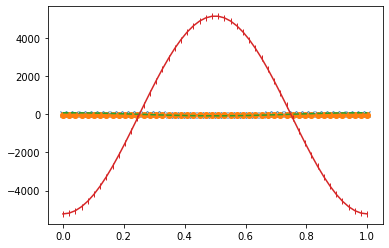

In [45]:
import numpy as np
import random as rn 
import matplotlib.pyplot as plt

alpha_j = 0.0016
betta_j = 0.0000007
gamma_j = 0.00008
delta_j = 0.000016

alpha_a = 0.006
betta_a = 0.000000075
gamma_a = 0.004
delta_a = 0.00006

sigma1 = 1
sigma2 = 1
D = 120
D0 = 70

t = np.linspace(0, 1)
Aj = -30.243356
Aa = 7.051655

Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))
x1 = Aa + Ba*np.cos(2*np.pi*t)

Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
x2 = Aj + Bj*np.cos(2*np.pi*t)

print('Эмпирические')
print(Aa, Ba)
print(Aj, Bj)


Ba = -(alpha_2*sigma1 - 2*delta_2*(Aa + D0))/(2*(4*(np.pi**2)*betta_2 + delta_2))
x3 = Aa + Ba*np.cos(2*np.pi*t)

Bj = -(alpha_1*sigma1 - 2*delta_1*(Aj + D0))/(2*(4*(np.pi**2)*betta_1 + delta_1))
x4 = Aj + Bj*np.cos(2*np.pi*t)

print('SVM')
print(Aa, Ba)
print(Aj, Bj)
plt.plot(t, x1, '-x') #Пожилые
plt.plot(t, x2, '-o') #Молодые
plt.plot(t, x3, '--') #Пожилые
plt.plot(t, x4, '-|') #Молодые
plt.show()

In [47]:
from sympy import *

s, p, q, r = symbols('s p q r')
print(diff(diff(-s - p - q + (4*r*p + (p + q - s)**2)**(1/2), q), q))


(-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5


In [42]:
import pandas as pd
import numpy as np
from scipy.optimize import differential_evolution

def F(v):
   if (4*alpha_a*(sigma1*(v[2] + D)) + betta_a*(-2*(np.pi*v[3])**2) + delta_a*(-((v[2] + D0)**2 + (v[3]**2)/2))*alpha_j*(sigma1*(v[0] + D)) + betta_j*(-2*(np.pi*v[1])**2) + delta_j*(-((v[0] + D0)**2 + (v[1]**2)/2)) + (alpha_j*(sigma1*(v[0] + D)) + betta_j*(-2*(np.pi*v[1])**2) + delta_j*(-((v[0] + D0)**2 + (v[1]**2)/2)) + gamma_j*(-sigma2*(v[0] + D + v[1]/2)) - gamma_a*(-sigma2*(v[2] + D + v[3]/2)))**2) < 0:
      return gamma_a*(-sigma2*(v[2] + D + v[3]/2)) + alpha_j*(sigma1*(v[0] + D)) + betta_j*(-2*(np.pi*v[1])**2) + delta_j*(-((v[0] + D0)**2 + (v[1]**2)/2)) + gamma_j*(-sigma2*(v[0] + D + v[1]/2)) - (np.sqrt(4*alpha_a*(sigma1*(v[2] + D)) + betta_a*(-2*(np.pi*v[3])**2) + delta_a*(-((v[2] + D0)**2 + (v[3]**2)/2))*alpha_j*(sigma1*(v[0] + D)) + betta_j*(-2*(np.pi*v[1])**2) + delta_j*(-((v[0] + D0)**2 + (v[1]**2)/2)) + (alpha_j*(sigma1*(v[0] + D)) + betta_j*(-2*(np.pi*v[1])**2) + delta_j*(-((v[0] + D0)**2 + (v[1]**2)/2)) + gamma_j*(-sigma2*(v[0] + D + v[1]/2)) - gamma_a*(-sigma2*(v[2] + D + v[3]/2)))**2)).real
   else:
      return gamma_a*(-sigma2*(v[2] + D + v[3]/2)) + alpha_j*(sigma1*(v[0] + D)) + betta_j*(-2*(np.pi*v[1])**2) + delta_j*(-((v[0] + D0)**2 + (v[1]**2)/2)) + gamma_j*(-sigma2*(v[0] + D + v[1]/2)) - np.sqrt(4*alpha_a*(sigma1*(v[2] + D)) + betta_a*(-2*(np.pi*v[3])**2) + delta_a*(-((v[2] + D0)**2 + (v[3]**2)/2))*alpha_j*(sigma1*(v[0] + D)) + betta_j*(-2*(np.pi*v[1])**2) + delta_j*(-((v[0] + D0)**2 + (v[1]**2)/2)) + (alpha_j*(sigma1*(v[0] + D)) + betta_j*(-2*(np.pi*v[1])**2) + delta_j*(-((v[0] + D0)**2 + (v[1]**2)/2)) + gamma_j*(-sigma2*(v[0] + D + v[1]/2)) - gamma_a*(-sigma2*(v[2] + D + v[3]/2)))**2)
   

v = np.array([-11.1596, -10.1579, -4.0033, -0.4988])

N = differential_evolution(F, bounds=((-D, 0), (-min(v[0] + D, -v[0]), min(v[0] + D, -v[0])), (-D, 0), (-min(v[2] + D, -v[2]), min(v[2] + D, -v[2]))))
N

C:\Users\evgen\AppData\Local\Temp/ipykernel_13376/865110825.py:7: RuntimeWarning: invalid value encountered in sqrt
  return gamma_a*(-sigma2*(v[2] + D + v[3]/2)) + alpha_j*(sigma1*(v[0] + D)) + betta_j*(-2*(np.pi*v[1])**2) + delta_j*(-((v[0] + D0)**2 + (v[1]**2)/2)) + gamma_j*(-sigma2*(v[0] + D + v[1]/2)) - (np.sqrt(4*alpha_a*(sigma1*(v[2] + D)) + betta_a*(-2*(np.pi*v[3])**2) + delta_a*(-((v[2] + D0)**2 + (v[3]**2)/2))*alpha_j*(sigma1*(v[0] + D)) + betta_j*(-2*(np.pi*v[1])**2) + delta_j*(-((v[0] + D0)**2 + (v[1]**2)/2)) + (alpha_j*(sigma1*(v[0] + D)) + betta_j*(-2*(np.pi*v[1])**2) + delta_j*(-((v[0] + D0)**2 + (v[1]**2)/2)) + gamma_j*(-sigma2*(v[0] + D + v[1]/2)) - gamma_a*(-sigma2*(v[2] + D + v[3]/2)))**2)).real


     fun: nan
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 60165
     nit: 1000
 success: False
       x: array([-104.23464629,   -4.80927519, -119.10975883,    2.49137634])

In [43]:
import pandas as pd
import numpy as np
from scipy.optimize import differential_evolution


def fitn(arg):
   J= gamma_a*(-sigma2*(v[2] + D + v[3]/2)) + alpha_j*(sigma1*(v[0] + D)) + betta_j*(-2*(np.pi*v[1])**2) + delta_j*(-((v[0] + D0)**2 + (v[1]**2)/2)) + gamma_j*(-sigma2*(v[0] + D + v[1]/2)) - np.sqrt(4*alpha_a*(sigma1*(v[2] + D)) + betta_a*(-2*(np.pi*v[3])**2) + delta_a*(-((v[2] + D0)**2 + (v[3]**2)/2))*alpha_j*(sigma1*(v[0] + D)) + betta_j*(-2*(np.pi*v[1])**2) + delta_j*(-((v[0] + D0)**2 + (v[1]**2)/2)) + (alpha_j*(sigma1*(v[0] + D)) + betta_j*(-2*(np.pi*v[1])**2) + delta_j*(-((v[0] + D0)**2 + (v[1]**2)/2)) + gamma_j*(-sigma2*(v[0] + D + v[1]/2)) - gamma_a*(-sigma2*(v[2] + D + v[3]/2)))**2)
   x=isNaN(J)
   if (x==False):
      return J
   else: return 0

arg = np.array([-11.1596, -10.1579, -4.0033, -0.4988])

bounds=((-D, 0), (-min(v[0] + D, -v[0]), min(v[0] + D, -v[0])), (-D, 0), (-min(v[2] + D, -v[2]), min(v[2] + D, -v[2])))
result = differential_evolution(fitn, bounds, strategy='rand2bin', popsize=15, maxiter=100, recombination=0.7, seed=1,
callback=None, disp=True, polish=False, updating='deferred')
def isNaN(num):
   if num!=num:
      return True
   else:
      return False

NameError: name 'isNaN' is not defined

C:\Users\evgen\AppData\Local\Temp/ipykernel_16504/232668977.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
C:\Users\evgen\AppData\Local\Temp/ipykernel_16504/232668977.py:10: RuntimeWarning: invalid value encountered in sqrt
  return gamma_a*(-sigma2*(Aa + D + (-(alpha_a*sigma1 - 2*delta_a*(Aa + D0))/(2*(4*(np.pi**2)*betta_a + delta_a)))/2)) + alpha_j*(sigma1*(Aj + D)) + betta_j*(-2*(np.pi*(-(alpha_j*sigma1 - 2*delta_j*(Aj + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))))**2) + delta_j*(-((Aj + D0)**2 + ((-(alpha_j*sigma1 - 2*delta_j*(Aj + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))**2)/2)) + gamma_j*(-sigma2*(Aj + D + (-(alpha_j*sigma1 - 2*delta_j*(Aj + D0))/(2*

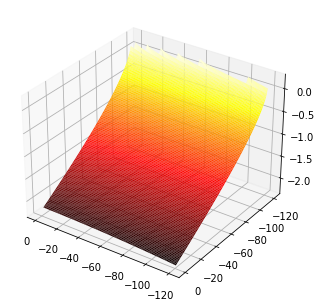

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
#Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))
#Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-D,0)
Y = np.arange(-D,0)
X,Y = np.meshgrid(X,Y)
def f(Aj,Aa):
    return gamma_a*(-sigma2*(Aa + D + (-(alpha_a*sigma1 - 2*delta_a*(Aa + D0))/(2*(4*(np.pi**2)*betta_a + delta_a)))/2)) + alpha_j*(sigma1*(Aj + D)) + betta_j*(-2*(np.pi*(-(alpha_j*sigma1 - 2*delta_j*(Aj + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))))**2) + delta_j*(-((Aj + D0)**2 + ((-(alpha_j*sigma1 - 2*delta_j*(Aj + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))**2)/2)) + gamma_j*(-sigma2*(Aj + D + (-(alpha_j*sigma1 - 2*delta_j*(Aj + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))/2)) - np.sqrt(4*alpha_a*(sigma1*(Aa + D)) + betta_a*(-2*(np.pi*(-(alpha_a*sigma1 - 2*delta_a*(Aa + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))))**2) + delta_a*(-((Aa + D0)**2 + ((-(alpha_a*sigma1 - 2*delta_a*(Aa + D0))/(2*(4*(np.pi**2)*betta_a + delta_a)))**2)/2))*alpha_j*(sigma1*(Aj + D)) + betta_j*(-2*(np.pi*(-(alpha_j*sigma1 - 2*delta_j*(Aj + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))))**2) + delta_j*(-((Aj + D0)**2 + ((-(alpha_j*sigma1 - 2*delta_j*(Aj + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))**2)/2)) + (alpha_j*(sigma1*(Aj + D)) + betta_j*(-2*(np.pi*(-(alpha_j*sigma1 - 2*delta_j*(Aj + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))))**2) + delta_j*(-((Aj + D0)**2 + ((-(alpha_j*sigma1 - 2*delta_j*(Aj + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))**2)/2)) + gamma_j*(-sigma2*(Aj + D + (-(alpha_j*sigma1 - 2*delta_j*(Aj + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))/2)) - gamma_a*(-sigma2*((Aa) + D + (-(alpha_a*sigma1 - 2*delta_a*(Aa + D0))/(2*(4*(np.pi**2)*betta_a + delta_a)))/2)))**2)

ax.plot_surface(X,Y,f(X,Y), rstride=1, cstride=1, cmap=plt.cm.hot)
ax.view_init(elev=30,azim=125)
plt.show()

C:\Users\evgen\AppData\Local\Temp/ipykernel_16504/2424747407.py:16: RuntimeWarning: invalid value encountered in sqrt
  return (-gamma_a*sigma2*(Aa + D + (-(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a)))/2)) - (alpha_j*sigma1*(Aj + D) + betta_j*(-2*(np.pi*(-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))))**2) + delta_j*(-((Aj + D0)**2 + ((-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))**2)/2))) - (-gamma_j*sigma2*(Aj + D + (-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))/2)) + np.sqrt(4*(alpha_a*sigma1*(Aa + D) + betta_a*(-2*(np.pi*(-(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))))**2) + delta_a*(-((Aa + D0)**2 + ((-(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a)))**2)/2)))*(alpha_j*sigma1*(Aj + D) + betta_j*(-2*(np.pi*(-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))))**2) + delt

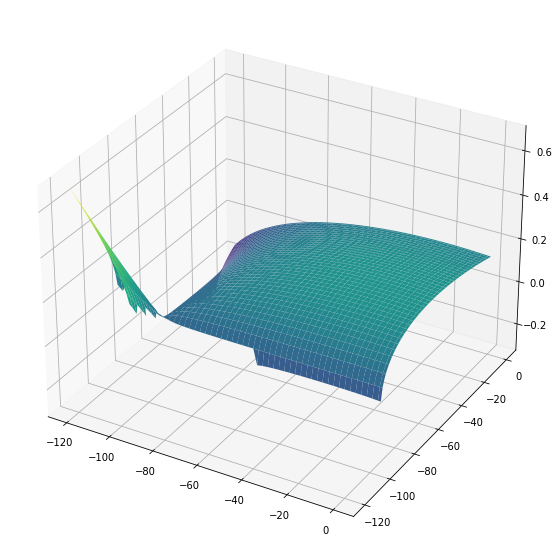

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

""" Aj = -11.1596
Aa = -4.0033 """
Bj = -(alpha_j*sigma1 - 2*delta_j*(arg[0]  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
Ba = -(alpha_a*sigma1 - 2*delta_a*(arg[1]  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))

# j = -(-gamma_a*sigma2*(arg[1] + D + (-(alpha_a*sigma1 - 2*delta_a*(arg[1]  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a)))/2)) - (alpha_j*sigma1*(arg[0] + D) + betta_j*(-2*(np.pi*(-(alpha_j*sigma1 - 2*delta_j*(arg[0]  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))))**2) + delta_j*(-((arg[0] + D0)**2 + ((-(alpha_j*sigma1 - 2*delta_j*(arg[0]  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))**2)/2))) - (-gamma_j*sigma2*(arg[0] + D + (-(alpha_j*sigma1 - 2*delta_j*(arg[0]  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))/2)) + np.sqrt(4*(alpha_a*sigma1*(arg[1] + D) + betta_a*(-2*(np.pi*(-(alpha_a*sigma1 - 2*delta_a*(arg[1]  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))))**2) + delta_a*(-((arg[1] + D0)**2 + ((-(alpha_a*sigma1 - 2*delta_a*(arg[1]  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a)))**2)/2)))*(alpha_j*sigma1*(arg[0] + D) + betta_j*(-2*(np.pi*(-(alpha_j*sigma1 - 2*delta_j*(arg[0]  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))))**2) + delta_j*(-((arg[0] + D0)**2 + ((-(alpha_j*sigma1 - 2*delta_j*(arg[0]  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))**2)/2))) + ((alpha_j*sigma1*(arg[0] + D) + betta_j*(-2*(np.pi*(-(alpha_j*sigma1 - 2*delta_j*(arg[0]  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))))**2) + delta_j*(-((arg[0] + D0)**2 + ((-(alpha_j*sigma1 - 2*delta_j*(arg[0]  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))**2)/2))) + (-gamma_j*sigma2*(arg[0] + D + (-(alpha_j*sigma1 - 2*delta_j*(arg[0]  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))/2)) - (-gamma_a*sigma2*(arg[1] + D + (-(alpha_a*sigma1 - 2*delta_a*(arg[1]  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a)))/2)))**2)
# уравнение поверхности
def f(Aj, Aa):
    #if 4*(alpha_a*sigma1*(Aa + D) + betta_a*(-2*(np.pi*(-(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))))**2) + delta_a*(-((Aa + D0)**2 + ((-(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a)))**2)/2)))*(alpha_j*sigma1*(Aj + D) + betta_j*(-2*(np.pi*(-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))))**2) + delta_j*(-((Aj + D0)**2 + ((-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))**2)/2))) + ((alpha_j*sigma1*(Aj + D) + betta_j*(-2*(np.pi*(-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))))**2) + delta_j*(-((Aj + D0)**2 + ((-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))**2)/2))) + (-gamma_j*sigma2*(Aj + D + (-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))/2)) - (-gamma_a*sigma2*(Aa + D + (-(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a)))/2)))**24*(alpha_a*sigma1*(Aa + D) + betta_a*(-2*(np.pi*(-(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))))**2) + delta_a*(-((Aa + D0)**2 + ((-(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a)))**2)/2)))*(alpha_j*sigma1*(Aj + D) + betta_j*(-2*(np.pi*(-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))))**2) + delta_j*(-((Aj + D0)**2 + ((-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))**2)/2))) + ((alpha_j*sigma1*(Aj + D) + betta_j*(-2*(np.pi*(-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))))**2) + delta_j*(-((Aj + D0)**2 + ((-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))**2)/2))) + (-gamma_j*sigma2*(Aj + D + (-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))/2)) - (-gamma_a*sigma2*(Aa + D + (-(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a)))/2)))**2 < np.array([0, 0]):
        #return 0
    return (-gamma_a*sigma2*(Aa + D + (-(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a)))/2)) - (alpha_j*sigma1*(Aj + D) + betta_j*(-2*(np.pi*(-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))))**2) + delta_j*(-((Aj + D0)**2 + ((-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))**2)/2))) - (-gamma_j*sigma2*(Aj + D + (-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))/2)) + np.sqrt(4*(alpha_a*sigma1*(Aa + D) + betta_a*(-2*(np.pi*(-(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))))**2) + delta_a*(-((Aa + D0)**2 + ((-(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a)))**2)/2)))*(alpha_j*sigma1*(Aj + D) + betta_j*(-2*(np.pi*(-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))))**2) + delta_j*(-((Aj + D0)**2 + ((-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))**2)/2))) + ((alpha_j*sigma1*(Aj + D) + betta_j*(-2*(np.pi*(-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))))**2) + delta_j*(-((Aj + D0)**2 + ((-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))**2)/2))) + (-gamma_j*sigma2*(Aj + D + (-(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j)))/2)) - (-gamma_a*sigma2*(Aa + D + (-(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a)))/2)))**2)
# создаём полотно для рисунка
fig = plt.figure(figsize = (10, 10))
# создаём рисунок пространства с поверхностью
ax = fig.add_subplot(1, 1, 1, projection = '3d')
# размечаем границы осей для аргументов
xval = np.linspace(-120, 0, 100)
yval = np.linspace(-120, 0, 100)
# создаём массив с xval столбцами и yval строками
# - в этом массиве будут храниться значения z
Aj, Aa = np.meshgrid(xval, yval)
# приравниваем z к функции от x и y 
z = f(Aj, Aa)
# создаём поверхность
surf = ax.plot_surface(
# отмечаем аргументы и уравнение поверхности
Aj, Aa, z, 
# шаг прорисовки сетки
# - чем меньше значение, тем плавнее
# - будет градиент на поверхности
rstride = 2,
cstride = 2,
cmap = cm.viridis)

In [ ]:
# -*- coding: cp936 -*-
import numpy as np
import matplotlib.pyplot as plt
import math
import random
 
# Растригр функция
def object_function(x):
    f = 0
    for i in range(0,len(x)):
        f = f + (x[i] ** 2 - (10 * math.cos(2 * np.pi * x[i])) + 10)
    return f
 # Параметр
def initpara():
         NP = 100 # население
         F = 0,6 # коэффициент увеличения
         CR = 0,7 # вероятность кроссовера
         поколение = 2000 # генетическая алгебра
    len_x = 10
    value_up_range = 5.12
    value_down_range = -5.12
    return NP, F, CR, generation, len_x, value_up_range, value_down_range
 # Инициализация населения
def initialtion(NP):
         np_list = [] # популяция, хромосома
    for i in range(0,NP):
                 x_list = [] # индивидуальный, ген
        for j in range(0,len_x):
            x_list.append(value_down_range + random.random() * (value_up_range - value_down_range))
        np_list.append(x_list)
    return np_list
 # Список вычитания
def substract(a_list,b_list):
    a = len(a_list)
    new_list = []
    for i in range(0,a):
        new_list.append(a_list[i]-b_list[i])
    return new_list
 # Добавление списков
def add(a_list,b_list):
    a = len(a_list)
    new_list = []
    for i in range(0,a):
        new_list.append(a_list[i]+b_list[i])
    return new_list
 # Умножение списка
def multiply(a,b_list):
    b = len(b_list)
    new_list = []
    for i in range(0,b):
        new_list.append(a * b_list[i])
    return new_list
 # Вариация
def mutation(np_list):
    v_list = []
    for i in range(0,NP):
        r1 = random.randint(0,NP-1)
        while r1 == i:
            r1 = random.randint(0,NP-1)
        r2 = random.randint(0,NP-1)
        while r2 == r1 | r2 == i:
            r2 = random.randint(0,NP-1)
        r3 = random.randint(0,NP-1)
        while r3 == r2 | r3 == r1 | r3 == i:
            r3 = random.randint(0,NP-1)
        
        v_list.append(add(np_list[r1], multiply(F, substract(np_list[r2],np_list[r3]))))
    return v_list
 # Крест
def crossover(np_list,v_list):
    u_list = []
    for i in range(0,NP):
        vv_list = []
        for j in range(0,len_x):
            if (random.random() <= CR) | (j == random.randint(0,len_x - 1)):
                vv_list.append(v_list[i][j])
            else:
                vv_list.append(np_list[i][j])
        u_list.append(vv_list)
    return u_list
 # Выберите
def selection(u_list,np_list):
    for i in range(0,NP):
        if object_function(u_list[i]) <= object_function(np_list[i]):
            np_list[i] = u_list[i]
        else:
            np_list[i] = np_list[i]
    return np_list
 # Основная функция
NP, F, CR, generation, len_x, value_up_range, value_down_range = initpara()
np_list = initialtion(NP)
min_x = []
min_f = []
for i in range(0,NP):
    xx = []
    xx.append(object_function(np_list[i]))
min_f.append(min(xx))
min_x.append(np_list[xx.index(min(xx))])
for i in range(0,generation):
    v_list = mutation(np_list)
    u_list = crossover(np_list,v_list)
    np_list = selection(u_list,np_list)
    for i in range(0,NP):
        xx = []
        xx.append(object_function(np_list[i]))
    min_f.append(min(xx))
    min_x.append(np_list[xx.index(min(xx))])
 # Вывод
min_ff = min(min_f)
min_xx = min_x[min_f.index(min_ff)]
print('the minimum point is x ')
print(min_xx)
print('the minimum value is y ')
print(min_ff)
 # Рисование
x_label = np.arange(0,generation+1,1)
plt.plot(x_label,min_f,color = 'blue')
plt.xlabel('iteration')
plt.ylabel('fx')
plt.savefig('./iteration-f.png')
plt.show()